# Tiny Forest Cover type - Hyperparameter Tuning
- https://archive.ics.uci.edu/ml/datasets/covertype

0. Spruce/Fir
1. Lodgepole Pine
2. Ponderosa Pine
3. Cottonwood/Willow
4. Aspen
5. Douglas-fir
6. Krummholz


### Original dataset contains 5,81,000 samples and 55 columns
### Tiny version contains 14,526 samples and 11 columns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
covtype = pd.read_csv("data/tinyCovtype.csv")

In [ ]:
covtype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2934,37,10,90,13,2219,220,219,133,2047,1
1,2679,32,23,90,29,1061,208,182,99,2015,2
2,2579,48,22,300,52,607,222,186,87,638,2
3,3277,158,5,297,37,5202,226,241,149,720,2
4,2494,90,6,324,0,983,230,230,134,4129,2


In [ ]:
covtype.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,14526.0,2956.846758,282.117553,1861.0,2809.0,2995.0,3160.0,3845.0
Aspect,14526.0,153.940245,112.045545,0.0,56.0,125.0,259.0,359.0
Slope,14526.0,14.109528,7.509749,0.0,9.0,13.0,18.0,56.0
Horizontal_Distance_To_Hydrology,14526.0,269.688834,211.475207,0.0,108.0,228.0,390.0,1328.0
Vertical_Distance_To_Hydrology,14526.0,46.817293,58.553923,-138.0,7.0,30.0,69.0,589.0
Horizontal_Distance_To_Roadways,14526.0,2349.663706,1564.840803,0.0,1101.0,2001.0,3331.0,7014.0
Hillshade_9am,14526.0,212.070770,26.776689,60.0,199.0,218.0,231.0,254.0
Hillshade_Noon,14526.0,223.153793,19.920193,74.0,213.0,226.0,237.0,254.0
Hillshade_3pm,14526.0,142.413672,38.429628,0.0,119.0,142.0,168.0,252.0
Horizontal_Distance_To_Fire_Points,14526.0,1982.948919,1326.048953,0.0,1026.0,1708.0,2563.0,7173.0


In [ ]:
covtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14526 entries, 0 to 14525
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           14526 non-null  int64
 1   Aspect                              14526 non-null  int64
 2   Slope                               14526 non-null  int64
 3   Horizontal_Distance_To_Hydrology    14526 non-null  int64
 4   Vertical_Distance_To_Hydrology      14526 non-null  int64
 5   Horizontal_Distance_To_Roadways     14526 non-null  int64
 6   Hillshade_9am                       14526 non-null  int64
 7   Hillshade_Noon                      14526 non-null  int64
 8   Hillshade_3pm                       14526 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  14526 non-null  int64
 10  Cover_Type                          14526 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [ ]:
X = covtype.drop("Cover_Type", axis=1)

In [ ]:
y = covtype.loc[:,"Cover_Type"]

In [ ]:
print("y_min: ", y.min())
print("y_max: ", y.max())

y_min:  1
y_max:  7


### Make class range from 0 to 6

In [ ]:
y = y - 1

print("y_min: ", y.min())
print("y_max: ", y.max())

y_min:  0
y_max:  6


In [ ]:
print(X.shape, y.shape)

(14526, 10) (14526,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(11620, 10) (2906, 10)


## Softmax - Multiclass Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
softmax_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
score_softmax = softmax_clf.score(X_test, y_test)

In [ ]:
print(score_softmax)

0.6276668960770819


## Check the predictions by Softmax regression


In [ ]:
softmax_pred = softmax_clf.predict(X_test[:10])

In [ ]:
print(softmax_pred)

[1 0 0 0 0 1 1 1 2 1]


In [ ]:
print(y_test[:10].values)

[1 0 0 4 6 1 1 0 1 0]


## Apply feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
softmax_clf_std = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_clf_std.fit(X_train_std, y_train)
score_softmax_std = softmax_clf_std.score(X_test_std, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(score_softmax_std)

0.700963523743978


## The results obtained for softmax regression:
- Without scaling: 62.8%
- With scaling: 70.1%

# Support Vector Machines (SVM)


## C-Support Vector Classification.

- The implementation is based on libsvm.
- The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

## The multiclass support is handled according to a one-vs-one scheme.
- https://en.wikipedia.org/wiki/Multiclass_classification

  - In the one-vs-one (OvO) reduction, one trains K (K − 1) / 2 binary classifiers for a K-way multiclass problem;
  - each receives the samples of a pair of classes from the original training set and must learn to distinguish these two classes.

  - At prediction time, a voting scheme is applied:
    - all K (K − 1) / 2 classifiers are applied to an unseen sample and
    - the class that got the highest number of "+1" predictions gets predicted by the combined classifier.

## Linear - SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(kernel='linear', C=10, random_state=42)
svc_clf.fit(X_train_std, y_train)
score_svc_linear = svc_clf.score(X_test_std, y_test)
print(score_svc_linear)

0.7026841018582244


## Kernel-RBF SVM

In [ ]:
svc_clf_rbf = SVC(kernel='rbf',C=5, gamma=0.5, random_state=42)
svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)
print(score_svc_rbf)

0.7660013764624914


# Bagging - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=25, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_std, y_train)
score_rf = rf_clf.score(X_test_std, y_test)
print(score_rf)

0.7966276668960771


## Boosting - Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, max_depth=12, random_state=42)
gb_clf.fit(X_train_std, y_train)
score_gb = gb_clf.score(X_test_std, y_test)
print(score_gb)

0.8093599449415003


## Predictions

In [ ]:
predicted_gb = gb_clf.predict(X_test_std)
print(predicted_gb[:10])

[1 0 0 4 0 1 1 0 1 0]


In [ ]:
print(y_test[:10].values)

[1 0 0 4 6 1 1 0 1 0]


## Performace Evaluation

Classification report for classifier GradientBoostingClassifier(max_depth=12, n_estimators=1000, random_state=42):
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1059
           1       0.81      0.86      0.84      1417
           2       0.72      0.75      0.74       179
           3       0.75      0.64      0.69        14
           4       0.60      0.26      0.36        47
           5       0.69      0.40      0.51        87
           6       0.87      0.79      0.83       103

    accuracy                           0.81      2906
   macro avg       0.75      0.64      0.68      2906
weighted avg       0.81      0.81      0.81      2906




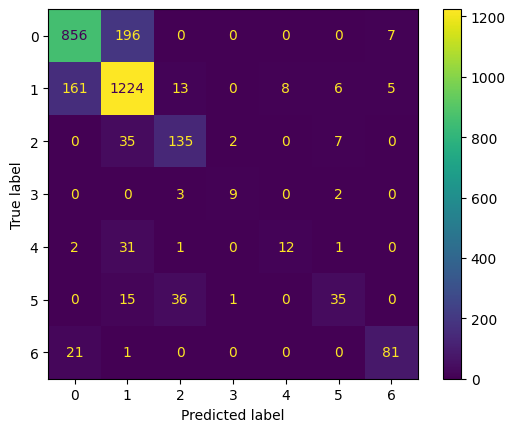

In [ ]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (gb_clf, metrics.classification_report(y_test, predicted_gb)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted_gb)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

# Hyperparameter tuning for RandomForest

### Cross-validation

__GridSearch__

In [ ]:
hpt_rf_clf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
learnRate = [0.2, 0.3, 0.4, 0.5]

In [ ]:
# Specify the parameter grid for tuning as list of dictionary

hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]

In [ ]:
hpt_param_grid

[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'max_depth': [2, 4, 6, 8, 10, 12, 14]}]

In [ ]:
grid_search = GridSearchCV(estimator = hpt_rf_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)

In [ ]:
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [ ]:
print(grid_search.best_params_)

{'max_depth': 14, 'n_estimators': 70}


In [ ]:
print(grid_search.best_score_)

0.7645438898450946


In [ ]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=14, n_estimators=70)


In [ ]:
CV_results = grid_search.cv_results_

In [ ]:
for elem in CV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.6173838209982788 0.02276146170321123 70
0.6369191049913941 0.008380880429562717 62
0.63407917383821 0.008084921983860946 67
0.632960413080895 0.006306392757508169 68
0.632960413080895 0.007692495690219126 68
0.6343373493975903 0.006783900920831794 65
0.6376936316695352 0.011752581999782841 61
0.636144578313253 0.007110121365141094 64
0.6341652323580036 0.006690461867668427 66
0.6364888123924268 0.007349820816797308 63
0.6693631669535285 0.009799341224661437 60
0.6712564543889845 0.005442818692200312 57
0.6739242685025818 0.008372038903280756 53
0.673235800344234 0.0036673452242104144 55
0.6708261617900172 0.007241199300503519 59
0.6714285714285715 0.008189588470478688 56
0.6740963855421687 0.004203674609920765 52
0.6712564543889845 0.006975519493686553 57
0.6735800344234079 0.004574882567986917 54
0.6744406196213425 0.006608039180878631 51
0.6907056798623064 0.005883533437224502 48
0.6919965576592084 0.0033263593958842677 46
0.693803786574871 0.0031337592867526883 44
0.69018932874354

__Random Search__

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)],
                  'max_depth': [j for j in range(2,15,2)]}

In [ ]:
hpt_param_dist

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [2, 4, 6, 8, 10, 12, 14]}

In [ ]:
random_search = RandomizedSearchCV(estimator = hpt_rf_clf,
                                   param_distributions=hpt_param_dist,
                                   cv=5)

In [ ]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 14}

In [ ]:
random_search.best_score_

0.7643717728055078

In [ ]:
random_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=50)

In [ ]:
rCV_results = random_search.cv_results_

In [ ]:
for elem in rCV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_estimators
param_max_depth
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
for mean_score, std_score, rank_score in zip(
    rCV_results['mean_test_score'], rCV_results['std_test_score'], rCV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.7605851979345954 0.0033507611590244055 2
0.6347676419965577 0.004924171945239239 9
0.7542168674698795 0.002363086095997579 3
0.6922547332185885 0.005858303760797762 6
0.7643717728055078 0.003238362774909958 1
0.7540447504302927 0.0016007810015265286 4
0.6320137693631669 0.010530834470547151 10
0.6748709122203098 0.005574573060482475 8
0.7161790017211704 0.004238764322211642 5
0.691222030981067 0.0030981067125645267 7
